In [1]:
from IPython.display import YouTubeVideo, Markdown, SVG
from functools import partial
YouTubeVideo_formato = partial(YouTubeVideo, modestbranding=1, disablekb=0,
                               width=640, height=360, autoplay=0, rel=0, showinfo=0)

display(Markdown(filename='../../preamble.md'))

### Instrucciones  y metodología asíncrona
Hola a todas y todos

- Este notebook forma parte del curso **INFO147: Computación científica con Python** de la carrera de Ingeniería Civil Informática de la Universidad Austral de Chile
- El profesor responsable es **Pablo Huijse**, por favor hacer sus consultas por slack o al correo phuijse at inf dot uach dot cl
- El material del curso se encuentra en https://github.com/magister-informatica-uach/INFO147 
- Se recomienda tener una copia local actualizada del repositorio


Para estudiar este material de forma asíncrona se recomienda seguir el flujo que se presenta a continuación

```bash 
for sección in notebook
do
    leer(sección) # Para incorporar los nuevos contenidos
    if ejercicios in sección
        resolver(ejercicios) # Para poner en práctica lo aprendido
    if video in sección
        ver(video) # Para profundizar y analizar la solución del ejercicio
done
```

In [3]:
%autosave 0
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import pandas as pd

from IPython.display import display
import ipywidgets as widgets
from functools import partial
slider_layout = widgets.Layout(width='600px', height='20px')
slider_style = {'description_width': 'initial'}
IntSlider_nice = partial(widgets.IntSlider, style=slider_style, layout=slider_layout, continuous_update=False)
FloatSlider_nice = partial(widgets.FloatSlider, style=slider_style, layout=slider_layout, continuous_update=False)
SelSlider_nice = partial(widgets.SelectionSlider, style=slider_style, layout=slider_layout, continuous_update=False)
from scipy.special import erf
gaussian_pdf = lambda x, mu=0, s=1: np.exp(-0.5*(x-mu)**2/s**2)/(s*np.sqrt(2*np.pi))
gaussian_cdf = lambda x, mu=0, s=1: 0.5 + 0.5*erf((x-mu)/(s*np.sqrt(2)))

Autosave disabled


# Mundo de datos

Los avances tecnológicos recientes nos permiten **medir, almacenar y transmitir** datos de toda índole

- Operaciones industriales
- Comercio
- Entretenimiento 
- Datos públicos y gubernamentales
- Datos médicos
- Ciencia: Genómica, Astronomía, Simulaciones, etc
- Vehículos autónomos
- Internet de las cosas

Pero

> Los datos crudos tienen poco valor, necesitamos **extraer información a partir de los datos**

Por ejemplo, podríamos estudiar
- ¿Cúales son las observaciones más cómunes? ¿Qué datos son más relevantes? ¿Cómo se comportan mis datos? 
- ¿Cúal es la diferencia entre dos muestras? ¿Son las diferencias que observo reales o productos del ruido?
- ¿Qué tan probable es que ocurra el suceso $X$? ¿Qué tan arriesgado es tomar la decisión $Y$?

> La **estadística** nos da herramientas para entender los procesos y tomar decisiones


<img src="https://proxy.duckduckgo.com/iu/?u=https%3A%2F%2Fcdn-images-1.medium.com%2Fmax%2F1600%2F1*ufWDxL-5ogd22Rg_37rakw.png&f=1">


En esta serie de lecciones aprenderemos a usar [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html) y [`numpy.random`](https://docs.scipy.org/doc/numpy/reference/routines.random.html) para resolver problemas de **inferencia estadística**

Pero antes, debemos revisar algunos fundamentos de probabilidades

# Fundamentos de probabilidad

Nuestros datos son **mediciones o observaciones** de un **sistema o proceso** que queremos analizar

Podemos clasificar un sistema como determinista o estocástico

> Un sistema **determinista** está gobernado por reglas que nos permiten calcular exactamente su estado final dado un cierto punto de partida (condición inicial)

Por ejemplo, en un sistema newtoniano ideal, si sabemos cuanta fuerza se aplica a un objeto podemos predecir cuanto se moverá

> Un sistema **estocástico** tiene un componente aleatorio, incluso usando siempre la misma condición inicial el estado final puede ser distinto

Por ejemplo, si tenemos todo el naipe frances bajo abajo frente a nosotros y sacamos una carta, no sabremos a a priori cual vamos a obtener

> La mayoría de los sistemas en el mundo real tienen una parte determinista y otra estocástica 

Las condiciones naturales varían constantemente. Los sensores y los equipos de medición están sujetos a ruido. En general todos los sistemas complejos tienen al menos un componente aleatorio

> Los sistemas estocásticos **son inciertos**. Para modelar y caracterizar la incertidumbre usamos el **lenguaje de las probabilidades** 


## Fuentes de incertidumbre

Nuestras mediciones pueden ser inciertas por diversas razones, por ejemplo

> **Nuestras observaciones son incompletas** 

<div>
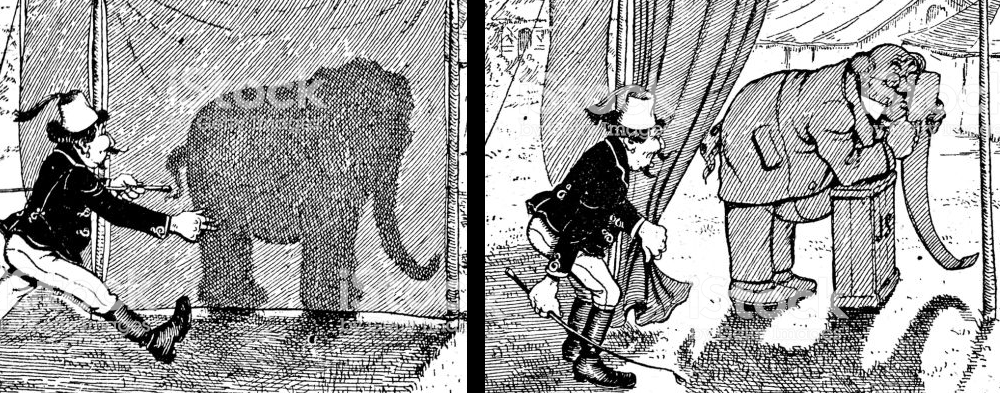
</div>

Nuestro sistema es determinista pero parece ser estocástico cuando lo observamos parcialmente

> **Nuestro modelo es incompleto**

Se refiere a que los supuestos o aproximaciones que hicimos del sistema introducen incerteza

> **Incerteza inherente o propia:** Se refiere a sistemas que son naturalmente inciertos. 

Por ejemplo, si estoy analizando sistemas de partículas, estoy sujeto al [principio cuántico de incertudimbre](https://es.wikipedia.org/wiki/Relaci%C3%B3n_de_indeterminaci%C3%B3n_de_Heisenberg)





## Variables aleatorias (VA)

> Es una variable que, al ser observada, puede tomar valores diferentes

Por ejemplo, el resultado de lanzar un dado o de lanzar una moneda

La medición de un sensor con ruido es también una variable aletoria

### Notación

- Para denotar a una VA usamos mayusculas: $X$
- Para denotar las observaciones de una VA usamos: $x\sim X$
- La probabilidad de observar $x$ es $P(X=x)$


### Distribución

Dominio
    
- Puede ser discreta o continua
    

    
- El comportamiento de $X$ está dictado por 
    - Función de masa de probabilidad (para $X$ discreta)
    
    $P(X=x) \in [0, 1]$
    
    $\sum_{x\in\mathcal{X}} P(X=x) = 1$    
    
    - Función de densidad de probabilidad (para $X$ continua)
    
    $f(x) \geq 0$
    
    $\int_{x\in\mathcal{X}} f(x) \,dx = 1$, 
    
    $P(a\leq X \leq b) = F(b) - F(a) = \int_{a}^{b} f(x) \,dx$
    
        - Función de densidad acumulada: 
        
        $F(a)  = \int_{-\infty}^{a} f(x) \,dx$
        
        
> **Importante:** Sólo en el caso discreto la distribución puede interpretarse como probabilidad

<IPython.core.display.Javascript object>


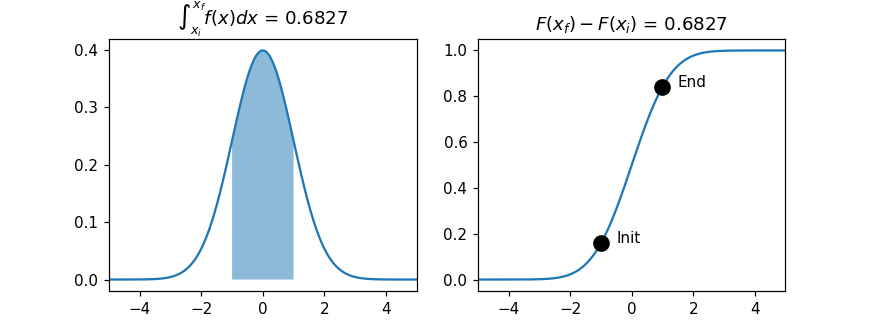

interactive(children=(FloatRangeSlider(value=(-1.0, 1.0), description='$x_i, x_f$', max=5.0, min=-5.0), Output…

In [4]:
plt.close('all'); fig, ax = plt.subplots(1, 2, figsize=(8, 3))
dt=1e-4; x = np.arange(-5, 5, step=dt)

def update_plot(x_r):
    xi, xf = x_r
    for axis in ax:
        axis.cla(); 
        axis.set_xlim([-5, 5]);
    ax[0].plot(x, gaussian_pdf(x)); ax[1].plot(x, gaussian_cdf(x));
    xrange = np.arange(xi, xf, step=dt)
    ax[0].fill_between(xrange, 0, gaussian_pdf(xrange), alpha=0.5)
    ax[1].scatter([xi, xf], [gaussian_cdf(xi), gaussian_cdf(xf)], s=100, c='k', zorder=100)
    ax[1].text(xi+0.5, gaussian_cdf(xi), "Init"); ax[1].text(xf+0.5, gaussian_cdf(xf), "End")
    ax[0].set_title("$\int_{x_i}^{x_f} f(x) dx$ = %0.4f" %(np.sum(gaussian_pdf(xrange))*dt))
    area = gaussian_cdf(xf) - gaussian_cdf(xi)
    ax[1].set_title("$F(x_f) - F(x_i)$ = %0.4f" %(area if area >= 0 else 0))

widgets.interact(update_plot, 
         x_r=widgets.FloatRangeSlider(description=r"$x_i, x_f$", min=-5, max=5, value=[-1, 1]));

## Probabilidad conjunta, marginal y condicional

La probabilidad de dos eventos $X=x$ e $Y=y$ se caracteriza con la distribución conjunta $P(X, Y)$

A partir de la conjunta se pueden obtener la probabilidad marginal de $X$ (o de $Y$)

$$
P(X=x) = \sum_{y \in \mathcal{Y}} P(X=x, Y=y) 
$$

Usando la conjunta y las marginales podemos obtener las probabilidades condicionales

$$
P(Y=y|X=x) = \frac{P(X=x, Y=y)}{P(X=x)}
$$

(ssi $P(X=x) \neq 0$)


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1, 2, 1, projection='3d')
x = np.arange(-4, 5, 1)
y = np.arange(-4, 5, 1)
X, Y = np.meshgrid(x, y)
XY = np.zeros_like(X)
XY[-3, 2:-2] = 1
XY[2, 2:-2] = 1
XY[2:-2, 4] = 1
XY = XY/np.sum(XY)
ax.bar(x, np.sum(XY, axis=1), zdir='x', zs=-4)
ax.bar(y, np.sum(XY, axis=0), zdir='y', zs=5)
ax.bar3d(X.ravel(), Y.ravel(), np.zeros_like(XY.ravel()), 1, 1, XY.ravel())
ax.set_xlim([-4, 5]); ax.set_xlabel('X')
ax.set_ylim([-4, 5]); ax.set_ylabel('Y')

ax2 = fig.add_subplot(1, 2, 2)

def update_plot(x):
    ax2.cla()
    ax2.bar(y, XY[X==x]/np.sum(XY[X==x]))
    ax2.set_title("P(Y|X={0})".format(x))
    ax2.set_ylim([0, 0.55])
    ax2.set_xlim([-4, 4])
    
widgets.interact(update_plot, x=IntSlider_nice(min=-4, max=4, value=0));

## Independencia

Si dos V.A. son independientes podemos escribir
$$
\begin{align}
P(x, y)  &= P(x)P(y|x)\nonumber \\
&= P(x)P(y) \nonumber
\end{align}
$$

> Saber que ocurrió $x$ no me sirve da nada para saber si ocurrió $y$
 

Dos V.A. son condicionalmente independientes si

$$
P(x, y|z)  = P(x|z)P(y|z)
$$


## Regla de la cadena

Podemos descomponer una probabilidad conjunta como

$$
\begin{align}
P(x_1, x_2, x_3) &= P(x_3|x_2, x_1) P(x_1, x_2) \nonumber \\
&= P(x_3|x_2, x_1) P(x_2|x_1) P(x_1) \nonumber 
\end{align}
$$

## Ley de probabilidad total

Si el espacio de probabilidad está particionado en $N$ pedazos y se conocen las probabilidades condicionales $P(X=x|Y=y_i)$ podemos calcular la probabilidad del evento $x$ usando

$$
P(X=x) = \sum_{i=1}^N P(X=x|Y=y_i) P(Y=y_i)
$$

## Teorema de Bayes

Podemos escribir 

- la probabilidad de un evento $y$ dado condiciones $x$: $p(y|x)$ 
- en función de nuestro conocimiento *a priori* sobre $y$: $p(y$)
- y de la verosimilitud de que se observen dichas condiciones si $y$ ocurriese: $p(x|y)$

como

$$
P(y | x) = \frac{P(x|y) P(y)}{P(x)} = \frac{P(x|y) P(y)}{\sum_{y\in\mathcal{Y}} P(x|y) P(y)}
$$

In [ ]:
fig, ax = plt.subplots(2, figsize=(7, 3), tight_layout=True)
x = np.linspace(-4, 4, num=1000)

def update_plot(loc, scale, skew, shape):
    distribution1 = scipy.stats.skewnorm(skew, loc=loc, scale=scale)
    distribution2 = scipy.stats.gennorm(shape, loc=loc, scale=scale*np.sqrt(2))
    [ax_.cla() for ax_ in ax]
    ax[0].plot(x, distribution1.pdf(x))
    ax[1].plot(x, distribution2.pdf(x))
    
widgets.interact(update_plot, loc=FloatSlider_nice(min=-3, max=3), 
                 scale=FloatSlider_nice(min=0.01, max=2., value=1), 
                 skew=FloatSlider_nice(min=-5, max=5, value=0),
                 shape=FloatSlider_nice(min=0.1, max=10, value=2));

## Algunas distribuciones de probabilidad

| Distribución | Fenomeno que representa | Ejemplo |
| --- | --- | --- |
| **Bernoulli** | Evento binario  | Lanzamiento de una moneda |
| **Binomial** | Multiples eventos binarios independientes | |
| **Categórica** | Evento con $k$ valores posibles | Lanzamiento de un dado, Ruleta |
| **Poisson** | Conteo de eventos ocurridos en un período de tiempo | Cantidad de alumnos que llegan entre 9:50 y 10:00| 
| **Exponencial** | Valor continuo positivo | Tiempo de espera entre eventos|
| **Gamma** | Valor continuo positivo | Tiempos de espera hasta que ocurren $n$ eventos|
| **Beta** | Valor continuo en $[0, 1]$ |  Tiempo para completar una tarea, proporciones|
| **Normal/Gaussiana** | Valor continuo ubicado en la vecindad de un valor central| [Demasiados](https://galtonboard.com/probabilityexamplesinlife)|
| **Uniforme** | Valor discreto/continuo acotado a un rango, todos con igual probabilidad de ocurrencia| |

<img src="https://thumbs.gfycat.com/AggressiveAromaticBuckeyebutterfly-size_restricted.gif">

***

Podemos usar `np.random` para generar números aleatorios con distintas propiedades
- `randn` : Números reales con distribución normal estándar
- `rand`: Números reales con distribución uniforme en $[0, 1]$
- `randint(low=1, high=10)`: Números enteros con distribución uniforme entre $[0, 10]$

Podemos usar `scipy.stats` para generar datos de una distribución específica
- [continua](https://docs.scipy.org/doc/scipy/reference/stats.html#continuous-distributions)
- [multivariada](https://docs.scipy.org/doc/scipy/reference/stats.html#multivariate-distributions)
- [discreta](https://docs.scipy.org/doc/scipy/reference/stats.html#discrete-distributions)

Las distribuciones tienen un constructor específico y métodos
- `pdf`/`pmf(x)` Retorna la distribución de probabilidad evaluada en $x$
- `cdf(x)` Distribución acumulada evaluada en $x$
- `ppf(p)` Inverso de la distribución acumulada
- `rvs(size=100)` Retorna $100$ muestras a partir de la distribución

## En detalle: Gaussiana/Normal Multivariada

- Dominio $x\in \mathbb{R}^d$
- Parámetros: 
    - Media $\mathbb{E}[X] = \mu \in \mathbb{R}^d$ 
    - Covarianza $\mathbb{E}[(X-\mu)(X-\mu)^T] = \Sigma \in \mathbb{R}^{d\times d}$ (semidefinida positiva)
- Función de densidad de probabilidad
$$
p(x| \mu, \Sigma) = \frac{1}{ \sqrt{(2 \pi)^d} |\Sigma |} \exp \left ( -\frac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu) \right)
$$

- Casos especiales
    - Covarianza diagonal: $\Sigma = [\sigma_1^2, \sigma_2^2, \ldots, \sigma_d^2] I$
    - Covarianza isotrópica (esférica): $\Sigma = \sigma^2 I$
    - Normal estándar: $\mu = [0, 0, \ldots, 0]$, $\Sigma = I$

In [ ]:
fig, ax = plt.subplots(1, figsize=(5, 4))

def update_plot(mu1, mu2, s1, s2, rho, seed):
    ax.cla()
    np.random.seed(seed)
    mu = np.array([mu1, mu2]); s = np.diag(np.array([s1, s2]))
    rot_mat = [[np.cos(rho), -np.sin(rho)], [np.sin(rho), np.cos(rho)]]
    L = np.dot(rot_mat, s)
    #x = np.random.multivariate_normal(mean=mu, cov=np.dot(L, L.T), size=5000)
    dist = scipy.stats.multivariate_normal(mean=mu, cov=np.dot(L, L.T))
    x = np.linspace(-3, 3)
    X, Y = np.meshgrid(x, x)
    Z = dist.pdf(np.dstack((X, Y)))
    ax.contour(X, Y, Z)
    xhat = dist.rvs(size=5000)
    ax.scatter(xhat[:, 0], xhat[:, 1], s=5, alpha=0.5)
    ax.set_xlim([-3, 3]); ax.set_ylim([-3, 3])
    ax.set_aspect('equal')
    
widgets.interact(update_plot, mu1=FloatSlider_nice(min=-2, max=2), mu2=FloatSlider_nice(min=-2, max=2),
                 s1=FloatSlider_nice(value=1, min=0.1, max=2), s2=FloatSlider_nice(value=1, min=0.1, max=2),
                 rho=FloatSlider_nice(value=0, min=-np.pi/2, max=np.pi/2), seed=IntSlider_nice());

## Ley de los grandes números

Si $X_1, X_2, \ldots, X_N$ son V.A independientes e idénticamente distribuidas (iid) con media $\mu$  entonces su promedio

$$
\bar X = \frac{1}{N} (X_1 + X_2 + \ldots + X_N)
$$

tiende a $\bar X \to \mu$ cuando $N \to \infty$

## Teorema central del límite

Si $X_1, X_2, \ldots, X_N$ son V.A iid, entonces su promedio 

$$
\bar X \sim \mathcal{N}(\mu, \sigma^2/N)
$$

> Sin importar su distribución original, si sumo muchas VA iid entonces la suma se distribuye normal

## En detalle: Distribución multinomial

- Dominio $x \in \{0, 1, \ldots n\}^k$
- Parámetros: 
    - $n>0$: Número de experimentos 
    - ${p_1, p_2, \ldots, p_k}$: Probabilidad de las categorías donde $\sum_i p_i = 1$
- Función de masa de probabilidad
$$
p(x| m, \{p\}) = \frac{n!}{x_1! x_2! \cdots x_k!} \prod_{i=1}^k {p_i}^{x_i}
$$

- Casos especiales
    - $k = 2$: Distribución binomial
    - $k = 2$ y $n = 1$: Distribución Bernoulli

In [ ]:
dist = scipy.stats.multinomial(n=2, p=[1/6]*6)
dist.rvs(size=1)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 3))

def update_plot(k):
    ax.cla()
    ax.set_title("Promedio de {0} lanzamiento/s de dado".format(k+1))
    dist = scipy.stats.multinomial(n=k+1, p=[1/6]*6)
    repeats = dist.rvs(size=1000)/(k+1)
    average_dice = np.sum(repeats*range(1, 7), axis=1)
    ax.hist(average_dice, bins=12, density=True)
    ax.set_xlim([1, 6])
update_plot(0)
#anim = animation.FuncAnimation(fig, update_plot, frames=20, interval=300, 
#                               repeat=True, blit=False)

## Descriptores de las distribuciones

Podemos describir una variable aleatoria $X$ con $x \sim f(x)$ usando

### Valor esperado

El valor medio de $X$

$$
\mathbb{E}_{x\sim f(x)} [ X ] = \int_{x\in \mathcal{X}} x f(x)  \,dx
$$

### Varianza 

La dispersión de $X$ en torno a su valor medio

$$
\text{Var}[X]  = \mathbb{E}_{x\sim f(x)} \left[\left(X - \mathbb{E}[X] \right)^2 \right]
$$

la relación lineal entre $X$ e $Y$

$$
\text{Cov}[X, Y]  = \mathbb{E}_{x\sim f_X(x), y\sim f_Y(y)} \left[\left(X - \mathbb{E}[X] \right) \left(Y - \mathbb{E}[Y] \right)^T \right]
$$


### Momentos estadísticos

$$
m_k [X] = \mathbb{E}_{x\sim f(x)} [ X^k ]
$$

- Tercer momento: Simetría 
- Cuarto momento: Cúrtosis



TODO: 
- Enlanzar con estimador muestral
- Dar ejemplo con la gaussiana